# Chapter 6: Deep learning

## Introducing convolutional networks

### Problem 1 ([link](http://neuralnetworksanddeeplearning.com/chap6.html#problem_393174)): equations of backpropagation in a convolutional network

We consider a network like the following, except that **there's only one convolutional layer and only one pooling layer:**

![img/conv_network.png](img/conv_network.png)

The leftmost arrows actually look like this:

![img/conv.png](img/conv.png)

And the second arrows like this:

![img/max_pooling.png](img/max_pooling.png)

The third arrow actually represents a full connection between the max-pooling layer and the output layer.

We'll call:

* $a_{j,k}^0$, $0 \leq j, k \leq 27$, the input activations;
* $w_{l,m}^1$, $0 \leq l, m \leq 4$, the shared weights for the convolutional layer;
* $b^1$, the shared bias for the convolutional layer;
* $z_{j,k}^1$, $0 \leq j, k \leq 23$, the weighted input to neuron $(j, k)$ (line $j$, column $k$) in the convolutional layer:

$$z_{j,k}^1 = b^1 + \sum_{l=0}^4 \sum_{m=0}^4  w_{l,m}^1 a_{j+l, k+m}^0$$

* $a_{j,k}^1$, $0 \leq j, k \leq 23$, the activation of neuron $(j, k)$ in the convolutional layer:

$$a_{j,k}^1 = \sigma \left(z_{j,k}^1 \right)$$

* $a_{j,k}^2$, $0 \leq j, k \leq 11$, the activation of neuron $(j, k)$ in the max-pooling layer:

$$a_{j,k}^2 = \max \left( a_{2j, 2k}^1, a_{2j, 2k+1}^1, a_{2j+1, 2k}^1, a_{2j+1, 2k+1}^1 \right)$$

So neuron $(j,k)$ in the convolutional layer will contribute to the computation of the max for neuron $\left( \left \lfloor{\frac j 2}\right \rfloor, \left \lfloor{\frac k 2}\right \rfloor \right)$

* **Note that the max-pooling layer doesn't have any weights, biases, or weighted inputs!**
* $w_{l;j,k}^3$, $0 \leq j, k \leq 11, 0 \leq l \leq 9$, the weight of the connection between neuron $(j,k)$ in the max-pooling layer and neuron $l$ in the output layer;
* $b_l^3$, $0 \leq l \leq 9$, the bias of neuron $l$ in the output layer;
* $z_l^3$, $0 \leq l \leq 9$, the weighted input of neuron $l$ in the output layer:

$$z_l^3 = b_l^3 + \sum\limits_{0 \leq j, k \leq 11} w_{l;j,k}^3 a_{j,k}^2$$

* $a_l^3$, $0 \leq l \leq 9$, the output activation of neuron $l$ in the output layer:

$$a_l^3 = \sigma \left( z_l^3 \right)$$

Now for comparison, here are equations BP1 - BP4 for regular fully connected networks:

* **BP1**: $\delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j)$
* **BP2**: $\delta^l_j = \sum_k w^{l+1}_{kj}  \delta^{l+1}_k \sigma'(z^l_j)$
* **BP3**: $\frac{\partial C}{\partial b^l_j} = \delta^l_j$
* **BP4**: $\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$

And their shortened derivations (only writing $\frac{\partial x}{\partial y}$ when $y$ has an influence on $x$):

* **BP1**:

$$\delta_j^L = \frac{\partial C}{\partial z_j^L} = \frac{\partial C}{\partial a_j^L} \frac{\partial a_j^L}{\partial z_j^L} = \frac{\partial C}{\partial a_j^L} \sigma'(z_j^L)$$

* **BP2**:

$$\delta_j^l = \frac{\partial C}{\partial z_j^l} = \sum\limits_k \frac{\partial C}{\partial z_k^{l+1}} \frac{\partial z_k^{l+1}}{\partial a_j^l} \frac{\partial a_j^l}{\partial z_j^l} = \sum\limits_k \delta_k^{l+1} w_{kj}^{l+1} \sigma'(z_j^l)$$

* **BP3**:

$$\frac{\partial C}{\partial b_j^l} = \frac{\partial C}{\partial z_j^l} \frac{\partial z_j^l}{\partial b_j^l} = \delta_j^l \times 1$$

* **BP4**:

$$\frac{\partial C}{\partial w_{jk}^l} = \frac{\partial C}{\partial z_j^l} \frac{\partial z_j^l}{\partial w_{jk}^l} = \delta_j^l a_k^{l-1}$$

Let's look at each equation in turn, with our new network architecture.

* **BP1**: The last layer following the previous network architecture, we see that the derivation of BP1 remains correct. Therefore, BP1 doesn't change.
* **BP2**: since the max-pooling layer doesn't have any weighted inputs, we'll just have to compute $\delta_{j,k}^1$.

\begin{equation*}
    \begin{aligned}
        \delta_{j,k}^1 &= \frac{\partial C}{\partial z_{j,k}^1} \\
        &= \sum\limits_{l=0}^9 \frac{\partial C}{\partial z_l^3} \frac{\partial z_l^3}{\partial z_{j,k}^1} \\
        &= \sum\limits_{l=0}^9 \delta_l^3 \frac{\partial z_l^3}{\partial a_{j', k'}^2} \frac{\partial a_{j', k'}^2}{\partial z_{j,k}^1} \qquad \text{with } j' = \left \lfloor{\frac j 2}\right \rfloor \text{ and } k' = \left \lfloor{\frac k 2}\right \rfloor  \\
        &\text{(} a_{j',k'}^2 \text{ being the only activation in the max-pooling layer affected by } z_{j,k}^1 \text{)} \\
        &= \sum\limits_{l=0}^9 \delta_l^3 w_{l;j',k'}^3 \frac{\partial a_{j', k'}^2}{\partial z_{j,k}^1} \\
        &= \sum\limits_{l=0}^9 \delta_l^3 w_{l;j',k'}^3 \frac{\partial a_{j', k'}^2}{\partial a_{j,k}^1} \frac{\partial a_{j,k}^1}{\partial z_{j,k}^1} \\
        &= \sum\limits_{l=0}^9 \delta_l^3 w_{l;j',k'}^3 \frac{\partial a_{j', k'}^2}{\partial a_{j,k}^1} \sigma' \left( z_{j,k}^1 \right)
    \end{aligned}
\end{equation*}

Now since $a_{j',k'}^2 = \max \left( a_{2j', 2k'}^1, a_{2j', 2k'+1}^1, a_{2j'+1, 2k'}^1, a_{2j'+1, 2k'+1}^1 \right)$ and we're talking about infinitesimal changes, we have:

\begin{eqnarray}
   \frac{\partial a_{j', k'}^2}{\partial a_{j,k}^1} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } a_{j,k}^1 \neq \max \left( a_{2j', 2k'}^1, a_{2j', 2k'+1}^1, a_{2j'+1, 2k'}^1, a_{2j'+1, 2k'+1}^1 \right) \\
      1 & \mbox{if } a_{j,k}^1 = \max \left( a_{2j', 2k'}^1, a_{2j', 2k'+1}^1, a_{2j'+1, 2k'}^1, a_{2j'+1, 2k'+1}^1 \right)
    \end{array}
  \right.
\end{eqnarray}

This is because $a_{j,k}^1$ only affects $a_{j',k'}^2$ if $a_{j,k}^1$ is the maximum activation in its local pooling field. In this case, we have $a_{j', k'}^2 = a_{j,k}^1$, so $\frac{\partial a_{j', k'}^2}{\partial a_{j,k}^1} = 1$.

And so to conclude the derivation of our new BP2:

\begin{eqnarray}
   \delta_{j,k}^1 = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } a_{j,k}^1 \neq \max \left( a_{2j', 2k'}^1, a_{2j', 2k'+1}^1, a_{2j'+1, 2k'}^1, a_{2j'+1, 2k'+1}^1 \right) \\
      \sum\limits_{l=0}^9 \delta_l^3 w_{l;j',k'}^3 \sigma' \left( z_{j,k}^1 \right) & \mbox{if } a_{j,k}^1 = \max \left( a_{2j', 2k'}^1, a_{2j', 2k'+1}^1, a_{2j'+1, 2k'}^1, a_{2j'+1, 2k'+1}^1 \right)
    \end{array}
  \right.
\end{eqnarray}

* **BP3**: we consider two cases:
 * $\frac{\partial C}{\partial b_l^3} = \delta_l^3$ as the third layer respects the previous architecture (the derivation still works);
 * $\frac{\partial C}{\partial b^1}$. This one is different, since the bias $b^1$ is shared for all neurons in the convolutional layer. We have:
 
\begin{equation*}
    \begin{aligned}
        \frac{\partial C}{\partial b^1} &= \sum\limits_{0 \leq j,k \leq 23} \frac{\partial C}{\partial z_{j,k}^1} \frac{\partial z_{j,k}^1}{\partial b^1} \\
        &= \sum\limits_{0 \leq j,k \leq 23} \delta_{j,k}^1 \frac{\partial z_{j,k}^1}{\partial b^1} \\
        &= \sum\limits_{0 \leq j,k \leq 23} \delta_{j,k}^1 \qquad \text{as } z_{j,k}^1 = b^1 + \sum_{l=0}^4 \sum_{m=0}^4  w_{l,m}^1 a_{j+l, k+m}^0
    \end{aligned}
\end{equation*}

* **BP4**:
 * $\frac{\partial C}{\partial w_{l;j,k}^3} = a_{j,k}^2 \delta_l^3$ since, again, the derivation still works for the third layer;
 * $\frac{\partial C}{\partial w_{l,m}^1}, 0 \leq l, m \leq 4$. These 25 weights are shared, and each of them is used in the computation of the weighted input of each neuron in the convolutional layer:

\begin{equation*}
    \begin{aligned}
        \frac{\partial C}{\partial w_{l,m}^1} &= \sum\limits_{0 \leq j, k \leq 23} \frac{\partial C}{\partial z_{j,k}^1} \frac{\partial z_{j, k}^1}{\partial w_{l,m}^1} \\
        &= \sum\limits_{0 \leq j, k \leq 23} \delta_{j,k}^1 \frac{\partial z_{j, k}^1}{\partial w_{l,m}^1} \\
        &= \sum\limits_{0 \leq j, k \leq 23} \delta_{j,k}^1 a_{j+l,k+m}^0 \qquad \text{as } z_{j,k}^1 = b^1 + \sum_{l=0}^4 \sum_{m=0}^4  w_{l,m}^1 a_{j+l, k+m}^0
    \end{aligned}
\end{equation*}

## Convolutional neural networks in practice

### Exercise 1 ([link](http://neuralnetworksanddeeplearning.com/chap6.html#exercise_683491)): importance of the fully-connected layer

Because I'm running code with a CPU and training the network is quite long (it would take around 30 minutes to train the network with the fully-connected layer for 60 epochs):
* I won't train the network with the fully-connected layer and will instead trust Nielsen's result of a 98.78 percent accuracy;
* I'll only train the network once, instead of keeping best-in-3 results.

For these reasons, the comparison won't be satisfying. To get a satisfying comparison, simply train 3 networks and keep the best result.

The code is in the `chap6ex1` directory.

`exec_with.py` trains a network with the fully-connected layer (which I haven't done), and `exec_without.py` trains a network without this layer.

The best classification accuracy obtained during these 60 epochs is 98.52 percent (at epoch 26).

It's worse than Nielsen's accuracy with a fully-connected layer, but I trained only one network, not 3 (as announced, the comparison isn't satisfying).

Anyway, the difference seems significant, so the fully-connected layer was probably helpful.

### Problem 2 ([link](http://neuralnetworksanddeeplearning.com/chap6.html#problem_834310)): using the tanh activation function

In the directory `chap6p2`, `exec_tanh` uses the hyperbolic tangent activation function.

To plot accuracies, I've simply modified `chap6p2/network3.py` so that it keeps and prints the list of per-epoch accuracies (variable `past_accuracies`), which I've copy-pasted below.

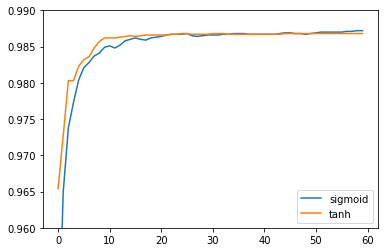

In [2]:
import matplotlib.pyplot as plt

accuracies_sigmoid = [
    0.9416, 0.9649, 0.9738, 0.9773, 0.9804, 0.9821, 0.9828, 0.9837, 0.9841, 0.9849, 0.9851, 0.9848, 0.9852, 0.9858,
    0.986, 0.9862, 0.986, 0.9859, 0.9862, 0.9863, 0.9864, 0.9866, 0.9867, 0.9867, 0.9867, 0.9868, 0.9865, 0.9864,
    0.9865, 0.9866, 0.9866, 0.9866, 0.9867, 0.9867, 0.9868, 0.9868, 0.9868, 0.9867, 0.9867, 0.9867, 0.9867, 0.9867,
    0.9867, 0.9868, 0.9869, 0.9869, 0.9868, 0.9868, 0.9867, 0.9868, 0.9869, 0.987, 0.987, 0.987, 0.987, 0.987, 0.9871,
    0.9871, 0.9872, 0.9872
]

accuracies_tanh = [
    0.9654, 0.9727, 0.9803, 0.9803, 0.9823, 0.9832, 0.9836, 0.9848, 0.9857, 0.9862, 0.9862, 0.9862,
    0.9863, 0.9864, 0.9865, 0.9864, 0.9865, 0.9866, 0.9866, 0.9866, 0.9866, 0.9866, 0.9867, 0.9867, 0.9868, 0.9868,
    0.9867, 0.9867, 0.9867, 0.9867, 0.9868, 0.9868, 0.9868, 0.9867, 0.9867, 0.9867, 0.9867, 0.9867, 0.9867, 0.9867,
    0.9867, 0.9867, 0.9867, 0.9867, 0.9868, 0.9868, 0.9868, 0.9868, 0.9868, 0.9868, 0.9868, 0.9868, 0.9868, 0.9868,
    0.9868, 0.9868, 0.9868, 0.9868, 0.9868, 0.9868
]

plt.ylim(bottom=0.96, top=0.99)
plt.plot(accuracies_sigmoid, label="sigmoid")
plt.plot(accuracies_tanh, label="tanh")
plt.legend()
plt.show()

Indeed, it appears that $\tanh$ learns a little faster in the beginning, but final accuracies are very close.

Why does it learn faster?

A first possible reason may be that since $\tanh'(z) = 4 \sigma'(2z)$, when $z$ is small, $\tanh'$ is closer to $1$ than $\sigma'$ because of the factor $4$. But when $z$ is big, because of the exponential, $4\sigma'(2z)$ becomes much smaller than $\sigma'(z)$.

And recall from Chapter 5 that small values of derivatives were a cause of the vanishing gradient problem. So the $\tanh$ function seems better for small values of $z$, and worse for large ones.

The benefit with small values of $z$ (which can be considered to be quite frequent, especially if there is some regularization) may outweigh the cost on large values.

Another reason might be that $\tanh$ is symmetric about the origin, while $\sigma$ is always positive. In [Efficient BackProp (1998)](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf), LeCun et al. write:

> Convergence is usually faster if the average of each input variable over the training set is close to zero. To see this, consider the extreme case where all the inputs are positive. Weights to a particular node in the first weight layer are updated by an amount proportional to $\delta x$ where $\delta$ is the (scalar) error at that node and $x$ is the input vector [...]. When all of the components of an input vector are positive, all of the updates of weights that feed into a node will be the same sign (i.e. sign($\delta$)). As a result, these weights can only all decrease or all increase *together* for a given input pattern. Thus, if a weight vector must change direction it can only do so by zigzagging which is inefficient and thus very slow. [...] Sigmoids that are symmetric about the origin are preferred for the same reason that inputs should be normalized, namely, because they are more likely to produce outputs (which are *inputs* to the next layer) that are on average close to zero.

Let's be more visual:

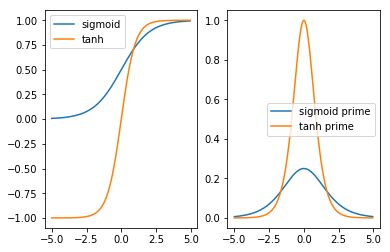

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigprime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return 2 * sigmoid(2 * x) - 1

def tanhprime(x):
    return 4 * sigprime(2*x)

X = np.arange(-5.0, 5.0, 0.05)
S = np.array([sigmoid(x) for x in X])
T = np.array([tanh(x) for x in X])
Sp = np.array([sigprime(x) for x in X])
Tp = np.array([tanhprime(x) for x in X])

plt.subplot(1, 2, 1)  # 1 line, 2 columns, position 1
plt.plot(X, S, label="sigmoid")
plt.plot(X, T, label="tanh")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(X, Sp, label="sigmoid prime")
plt.plot(X, Tp, label="tanh prime")
plt.legend()

plt.show()

The "*symmetric about the origin*" argument suggests trying to shift the sigmoid a little down to satisfy this condition: using $\sigma(z) - \frac 1 2$ as an activation function (by executing `exec_shifted_sig.py`), we get:

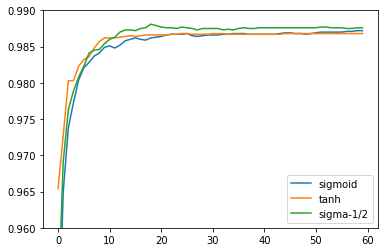

In [4]:
accuracies_shifted_sig = [
    0.9489, 0.9691, 0.9763, 0.9789, 0.9808, 0.9823, 0.9841, 0.9845, 0.9846, 0.9854, 0.986, 0.9863, 0.987, 0.9873,
    0.9873, 0.9872, 0.9875, 0.9876, 0.9881, 0.9879, 0.9877, 0.9876, 0.9876, 0.9875, 0.9877, 0.9876, 0.9875, 0.9873,
    0.9875, 0.9875, 0.9875, 0.9875, 0.9873, 0.9874, 0.9873, 0.9875, 0.9876, 0.9875, 0.9875, 0.9876, 0.9876, 0.9876,
    0.9876, 0.9876, 0.9876, 0.9876, 0.9876, 0.9876, 0.9876, 0.9876, 0.9876, 0.9877, 0.9877, 0.9876, 0.9876, 0.9876,
    0.9875, 0.9875, 0.9876, 0.9876
]

plt.ylim(bottom=0.96, top=0.99)
plt.plot(accuracies_sigmoid, label="sigmoid")
plt.plot(accuracies_tanh, label="tanh")
plt.plot(accuracies_shifted_sig, label="sigma-1/2")
plt.legend()
plt.show()

We learn faster than the standard sigmoid but a little slower than $\tanh$, but we reach better stabilized accuracies! (Again, I've only trained one network, so those results shouldn't be over-interpreted).


What about multiplying the derivative by $2$, to get closer to the derivative of $\tanh$? Let's try $2\sigma(z) - 1$ (`exec_shifted_2sig.py`):

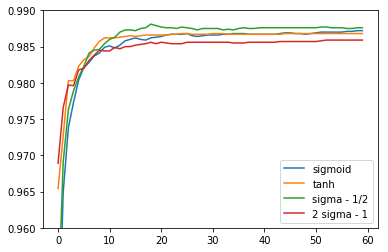

In [5]:
accuracies_shifted_2sig = [
    0.9689, 0.9766, 0.9797, 0.9796, 0.9818, 0.982, 0.9831, 0.9838, 0.9845, 0.9844, 0.9844, 0.9849, 0.9847, 0.985, 0.985,
    0.9852, 0.9853, 0.9854, 0.9856, 0.9854, 0.9856, 0.9855, 0.9854, 0.9854, 0.9854, 0.9856, 0.9856, 0.9856, 0.9856,
    0.9856, 0.9856, 0.9856, 0.9856, 0.9856, 0.9855, 0.9855, 0.9855, 0.9856, 0.9856, 0.9856, 0.9856, 0.9856, 0.9856,
    0.9857, 0.9857, 0.9857, 0.9857, 0.9857, 0.9857, 0.9857, 0.9857, 0.9858, 0.9859, 0.9859, 0.9859, 0.9859, 0.9859,
    0.9859, 0.9859, 0.9859
]

plt.ylim(bottom=0.96, top=0.99)
plt.plot(accuracies_sigmoid, label="sigmoid")
plt.plot(accuracies_tanh, label="tanh")
plt.plot(accuracies_shifted_sig, label="sigma - 1/2")
plt.plot(accuracies_shifted_2sig, label="2 sigma - 1")
plt.legend()
plt.show()

The only thing that is improved is the classification accuracy of the very first epochs. Then our stabilized accuracies are worse.

With the caveats that I only tested each configuration once and didn't optimize the hyper-parameters every time, this seems to suggest that the "*symmetric about the origin*" argument was more relevant than the "*usually higher derivatives*" one.

Due to the execution time on my CPU, I didn't
> Try a half-dozen iterations on the learning hyper-parameters or network architecture, searching for ways that tanh may be superior to the sigmoid.

But you shouldn't have any trouble doing it.

### Problem 3 ([link](http://neuralnetworksanddeeplearning.com/chap6.html#problem_437600))

By displacing each training image by a single pixel (up, down, left, or right), the convolutional layers are only displaced by a single pixel, too. But then the max-pooling layer can look quite different, as for each of its neurons, the 4 activations taken into account for the computation of the maximum will be different (more precisely, 2 will remain, but 2 will be new).

## The code for our convolutional networks

### Problems 4 - 9 ([link](http://neuralnetworksanddeeplearning.com/chap6.html#problems_269956)): some improvements of `network3.py`

I'll consider each of these problems in detail below, but a few remarks apply to all of them:
* the code is in the `chap6p4-9` directory;
* because running the most complex networks would take too much time on my CPU, I've trained a simple network in each of the problems below: 784 input neurons, one ConvPoolLayer with 5 feature maps, a single fully-connected layer with 30 neurons, and a softmax output layer (see `exec_network3.py`).

### Problem 4: implement early stopping

As in Chapter 3, Problem 12, I've implemented a no-improvement-in-$n$-epochs early stopping schedule.

In `network3p4.py`:
* I've tracked the past validation accuracies in the variable `past_accuracies`;
* the SGD method doesn't take `epochs` as a parameter anymore, but `es` instead (for *early stopping*, the $n$ in "no-improvement-in-$n$-epochs);
* the main loop is not:

```
for epoch in range(epochs):
```

anymore, but:

```
while (len(past_accuracies) <= es or
       max(past_accuracies[-es:]) > past_accuracies[-es - 1]):
```

And the variable `epoch` is incremented manually at each iteration.

Testing (`exec_p4.py`) with `es=2` we get:

```
Running with a CPU.  If this is not desired, then the modify network3.py to set
the GPU flag to True.
...
Epoch 0: validation accuracy 93.40%
...
Epoch 10: validation accuracy 98.22%
...
Epoch 11: validation accuracy 98.22%
...
Epoch 12: validation accuracy 98.21%
Finished training network.
Best validation accuracy of 98.22% obtained at iteration 59999
Corresponding test accuracy of 98.00%
```

### Problem 5: Add a `Network` method to return the accuracy on an arbitrary data set

TODO

### Problem 6: Modify the `SGD` method to allow the learning rate $\eta$ to be a function of the epoch number

We'll implement an exponential decrease in the learning rate (which is the easiest to implement, and a reasonable schedule). I'd like the learning rate to be divided by 2 every 10 epochs. So we need to multiply it by $\frac{1}{2^{1/10}}$ at every epoch.

It's more convenient to update the learning rate with the other parameters, for every mini-batch. Since there are 5,000 mini-batches per epoch (with a mini-batch size of 10), this means that we'll want to multiply the learning rate by $\frac{1}{2^{1/50,000}} \approx 0.999986$ for every mini-batch.

The notable changes in `network3p6.py` are:

* I've created a shared variable for the learning rate, in order to update it easily using Theano:


```
eta_shared = theano.shared(np.array(eta, dtype=theano.config.floatX))
```

* I've updated it using the list `updates`:

```
updates = [(param, param-eta_shared.get_value()*grad)
           for param, grad in zip(self.params, grads)]
updates.append((eta_shared, 0.999986 * eta_shared))
```

Executing `exec_p6.py` gives:

```
Running with a CPU.  If this is not desired, then the modify network3.py to set
the GPU flag to True.
...
Epoch 0: validation accuracy 93.47%
This is the best validation accuracy to date.
The corresponding test accuracy is 92.87%
New learning rate: 0.093
...
Epoch 9: validation accuracy 98.07%
This is the best validation accuracy to date.
The corresponding test accuracy is 97.85%
New learning rate: 0.050
...
Epoch 19: validation accuracy 98.43%
This is the best validation accuracy to date.
The corresponding test accuracy is 98.08%
New learning rate: 0.025
```

Which is what we want.

### Problem 7: expand the training data with rotations, skewing, and translation

When Nielsen expanded the data set with translations of a single pixel, it multiplied the size of the training data by 5. To incorporate these 3 techniques, we won't be able to explicitly generate the expanded data set. Instead, for every mini-batch, we'll randomly transform each of its 10 images by combining:

* a random rotation chosen uniformly between -5 and 5 degrees;
* a random translation of -1, 0, or 1 pixel (with equal probabilities) horizontally;
* the same vertically;
* a random skewing (centered in the middle of the image), defined by a translation of the upper pixels of -1, 0, or 1 pixel.

I've written `display_transformed_image.py` to test those changes. With the first picture in MNIST:

<img src="img/5.png" alt="img/5.png" style="width: 300px;"/>

We arrive at pictures like this:

<div style="display: table;">
    <div style="display: table-cell; vertical-align: middle;">
        <img src="img/5_tr1.png" alt="img/5.png" style="width: 300px;"/>
    </div>
    <div style="display: table-cell; vertical-align: middle;">
        <img src="img/5_tr2.png" alt="img/5.png" style="width: 300px;"/>
    </div>
    <div style="display: table-cell; vertical-align: middle;">
        <img src="img/5_tr3.png" alt="img/5.png" style="width: 300px;"/>
    </div>
    <div style="display: table-cell; vertical-align: middle;">
        <img src="img/5_tr4.png" alt="img/5.png" style="width: 300px;"/>
    </div>
</div>

Then I wasn't able to make it work with Theano :(